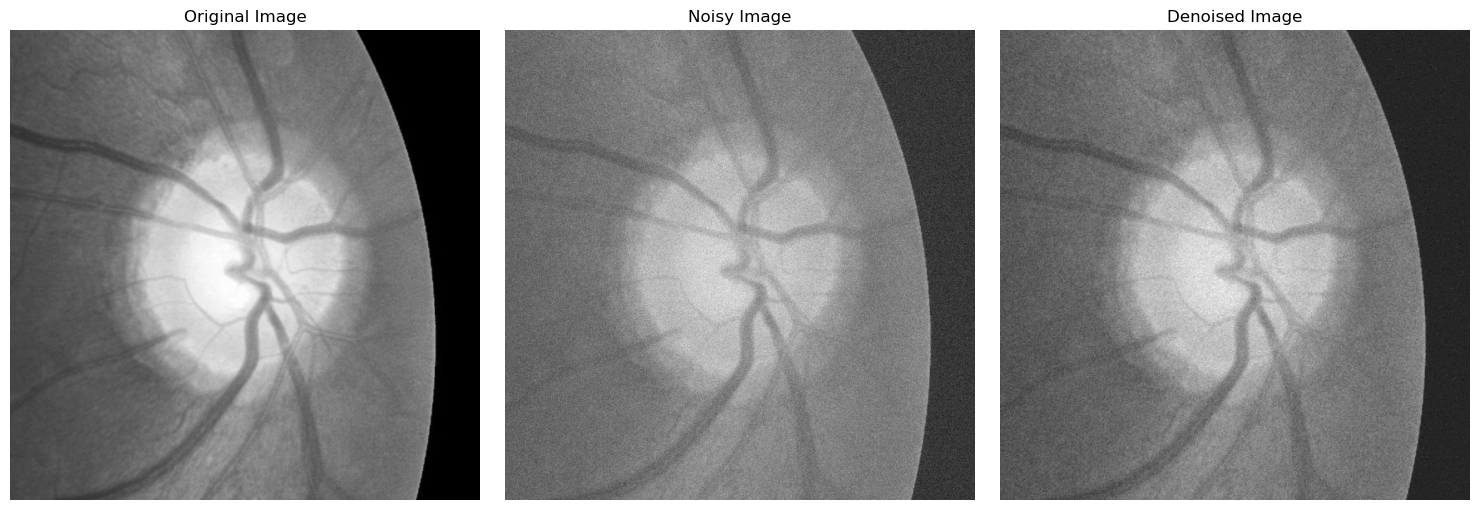

In [2]:
# Install PyWavelets if you haven't already
# !pip install PyWavelets

import pywt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "ROI/TRAIN092683.JPG"
image = np.array(Image.open(image_path).convert('L'))  # Convert image to grayscale

# Add noise to the image (for demonstration)
noisy_image = image + np.random.normal(0, 20, size=image.shape)

# Perform 2D DWT
coeffs = pywt.dwt2(noisy_image, 'haar')

# Denoise the coefficients
threshold = 20  # Adjust the threshold as needed
coeffs_denoised = tuple(pywt.threshold(c, threshold, mode='soft') for c in coeffs)

# Reconstruct the denoised image
denoised_image = pywt.idwt2(coeffs_denoised, 'haar')

# Display original, noisy, and denoised images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title('Denoised Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()
